#**INDRODUCTION**

**Olist** : Entreprise brésilienne aidant les commercants à vendre leurs produits sur diverses marketplaces en ligne.

**Objectif 1** : Segmentation de qualité des clients

**Objectif 2** : Proposition d'un contrat de maintenance

# 1.**Exploration des données**

- Import des bibliothèques nécessaires

In [ ]:
#pip install texthero

In [ ]:
# Import des bibliothèques nécessaires
import os
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats
import json
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from xgboost import XGBClassifier
from xgboost import plot_importance

def import_libraries():
    print("Bibliothèques importées avec succès.")

# Appel de la fonction pour importer les bibliothèques
import_libraries()

Bibliothèques importées avec succès.


- Chargement des données

In [ ]:
def load_data(directory_path):
    # Montez le lecteur Google Drive
    from google.colab import drive
    drive.mount('/gdrive')

    # Liste des fichiers dans le répertoire
    files = [file for file in os.listdir(directory_path) if file.endswith('.csv') and file != 'Projet4.ipynb']

    # Dictionnaire pour stocker les DataFrames
    data_frames = {}

    for file in files:
        # Construire le chemin complet du fichier
        file_path = os.path.join(directory_path, file)

        data_frames[file.split('.')[0]] = pd.read_csv(file_path)

    for df_name in data_frames.keys():
        print(df_name)

    return data_frames

directory_path = "/gdrive/MyDrive/Colab Notebooks/Projet_4"

# Appel de la fonction pour charger les données
loaded_data = load_data(directory_path)

Mounted at /gdrive
olist_customers_dataset
olist_geolocation_dataset
olist_order_payments_dataset
product_category_name_translation
olist_order_items_dataset
olist_orders_dataset
olist_products_dataset
olist_sellers_dataset
olist_order_reviews_dataset
olist-cust-seg
data_cluster_2_orders
data_simulation
data_simulation1


- Données des clients (customers)

In [ ]:
customers = loaded_data['olist_customers_dataset']
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Customers comporte 99441 observations avec cinq variables

- Les données de géolocalisation (geolocation)

In [ ]:
geolocation = loaded_data['olist_geolocation_dataset']
geolocation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Les données de géolocalisation contiennent 1000163 observations avec cinq variables également.

In [ ]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


La latitude a une moyenne d'environ -21.18, signalant une position générale dans l'hémisphère sud, avec la majorité des données entre -23.60 et -19.98.

Pour la longitude, la moyenne est d'environ -46.39, suggérant une position à l'ouest du méridien de Greenwich, avec la majorité des données entre -48.57 et -43.77.

- Données des commandes clients (orders)

In [ ]:
orders  = loaded_data ['olist_orders_dataset']
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Ce fichier regroupe les entêtes de commandes, identifiées par un order_id unique et rattaché à un client par le customer_id.

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


- Données des articles (order_items)

In [ ]:
order_items  = loaded_data['olist_order_items_dataset']
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Le fichier article regroupe les identifiant unique de la commande(order_id), des  Identifiant séquentiel des items d'une même commande(order_item_id), dentifiant unique du produit(product_id), etc.

In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


- Données des reglements (order_payments)

In [ ]:
order_payments  = loaded_data['olist_order_payments_dataset']
order_payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


La base de reglement comporte  103886 avec plus de cinq variables.

- Données Avis clients (order_reviews)

In [ ]:
order_reviews = loaded_data['olist_order_reviews_dataset']
order_reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


la base avis client possède 99224 obervation avec 7 variables.

- Données des produits (products)

In [ ]:
products = loaded_data['olist_products_dataset']
products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


La base products comportent 32951 observations avec 9 variables.

- Données des vendeurs (sellers)

In [ ]:
sellers = loaded_data['olist_sellers_dataset']
sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


La base vendeur comporte 3095 observations avec quatre variables.

- Données des Categories traduites (categories)

In [ ]:
categories = loaded_data['product_category_name_translation']
categories.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


La base de données catégories traduites comporte 71 observations avec deux variables.

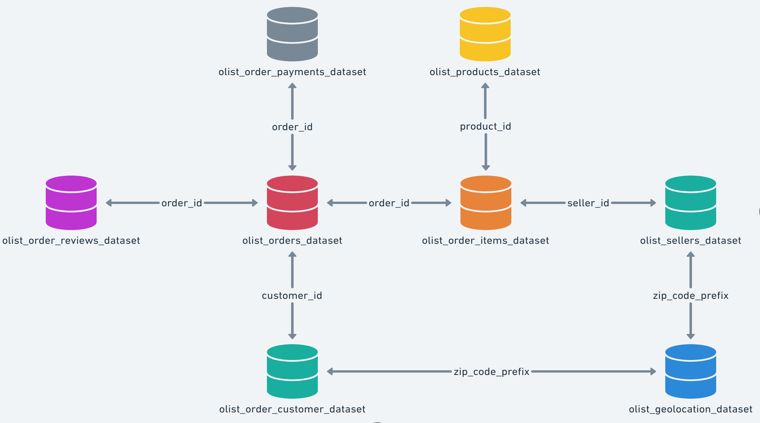

# 2.**Analyse et fusion**


In [ ]:
# Fusion et prétraitement des données
products = pd.merge(loaded_data['olist_products_dataset'], loaded_data['product_category_name_translation'], how="left", on="product_category_name")
products.drop(["product_category_name", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"], axis=1, inplace=True)
products.rename(columns={"product_category_name_english": "product_category_name"}, inplace=True)

- Visualisation de la répartition des diverses catégories de produits

<ipython-input-309-bde17ecb1c79>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




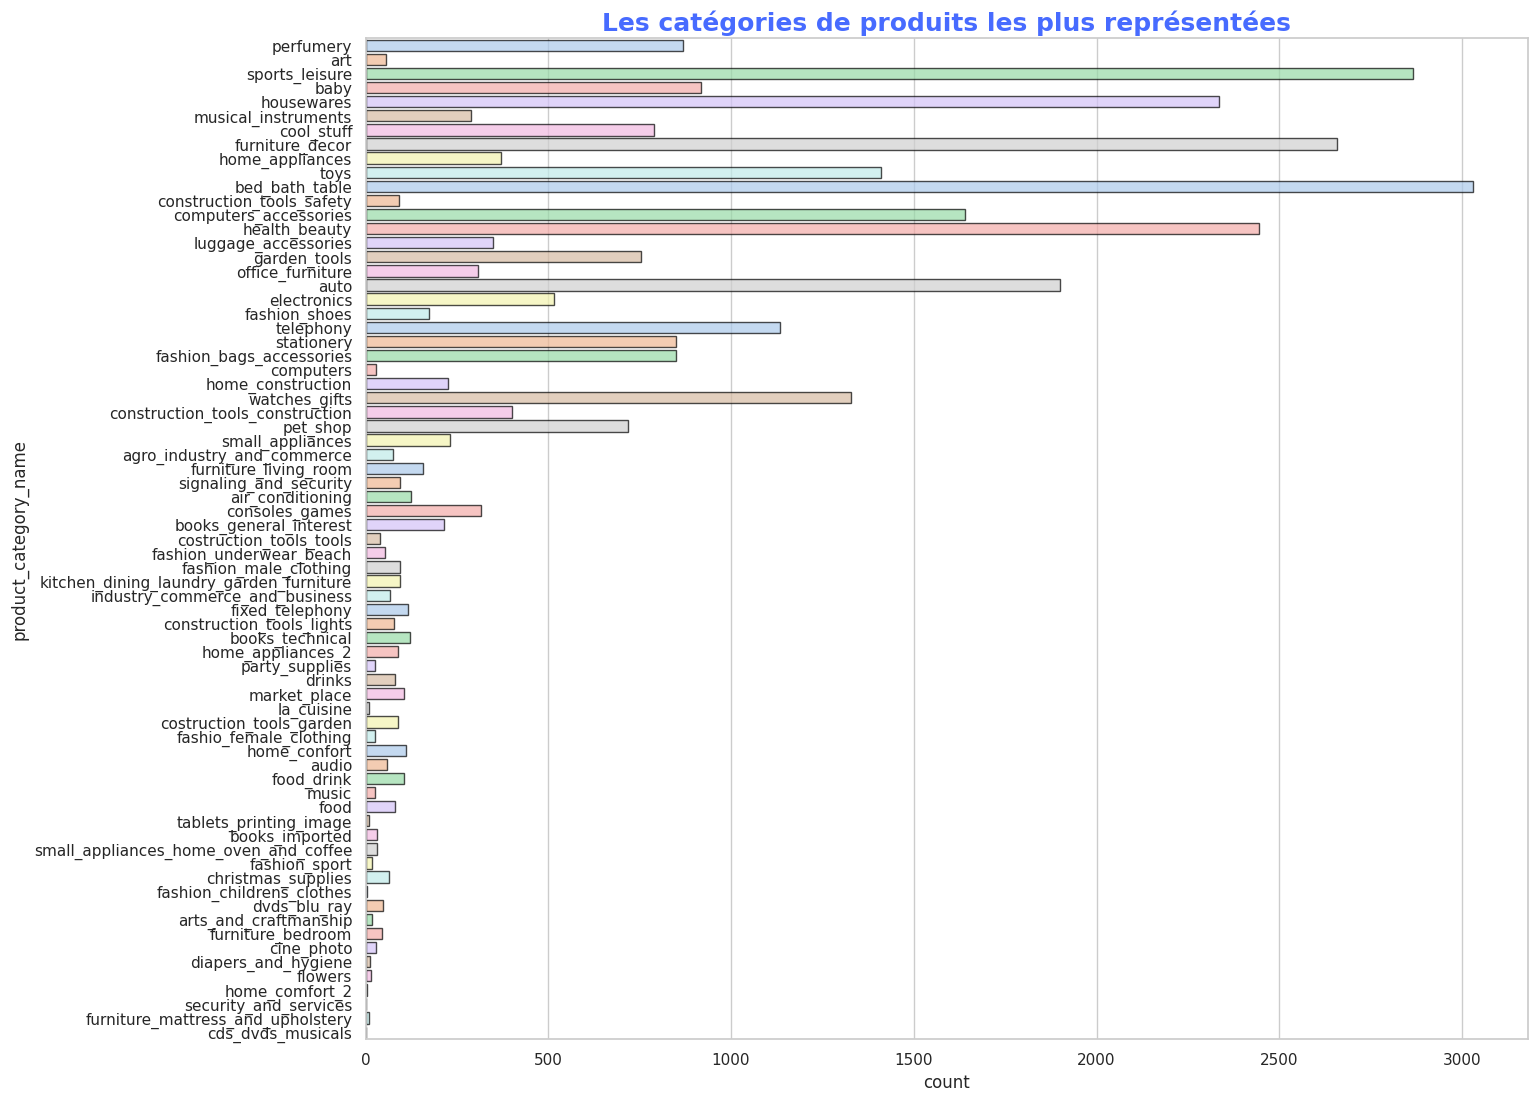

In [ ]:
# Visualisation de la répartition des catégories de produits
sns.set(style="whitegrid")
plt.figure(figsize=(15, 13))
sns.countplot(data=products, y="product_category_name", edgecolor="black", palette="pastel", alpha=0.7)
plt.title("Les catégories de produits les plus représentées", fontsize=18, color="#476bff", weight="bold")
plt.show()

- Fusion Commandes et clients¶


In [ ]:
order_items = pd.merge(order_items, orders,
                       how="left",
                       on="order_id")

del_features_list = ["seller_id", "shipping_limit_date",
                     "order_approved_at",
                     "order_delivered_carrier_date",
                     "order_estimated_delivery_date"]
order_items.drop(del_features_list,
                 axis=1,
                 inplace=True)
order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31


In [ ]:
order_items['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [ ]:
order_items.shape

(112650, 9)

order_items regroupe les données de lignes de commandes, d'entêtes de commandes et de données clients dans un unique dataframe.

In [ ]:
order_items.groupby(by="order_status").agg({'order_item_id' : "count"})


,order_item_id
order_status,
approved,3
canceled,542
delivered,110197
invoiced,359
processing,357
shipped,1185
unavailable,7


Nous allons conserver les lignes qui ont le status delivré et laisser ceux qui sont en cours



In [ ]:
order_items = order_items[order_items["order_status"] == "delivered"]

- Evolution du nombre de commandes passées par jour sur le site E-Commerce

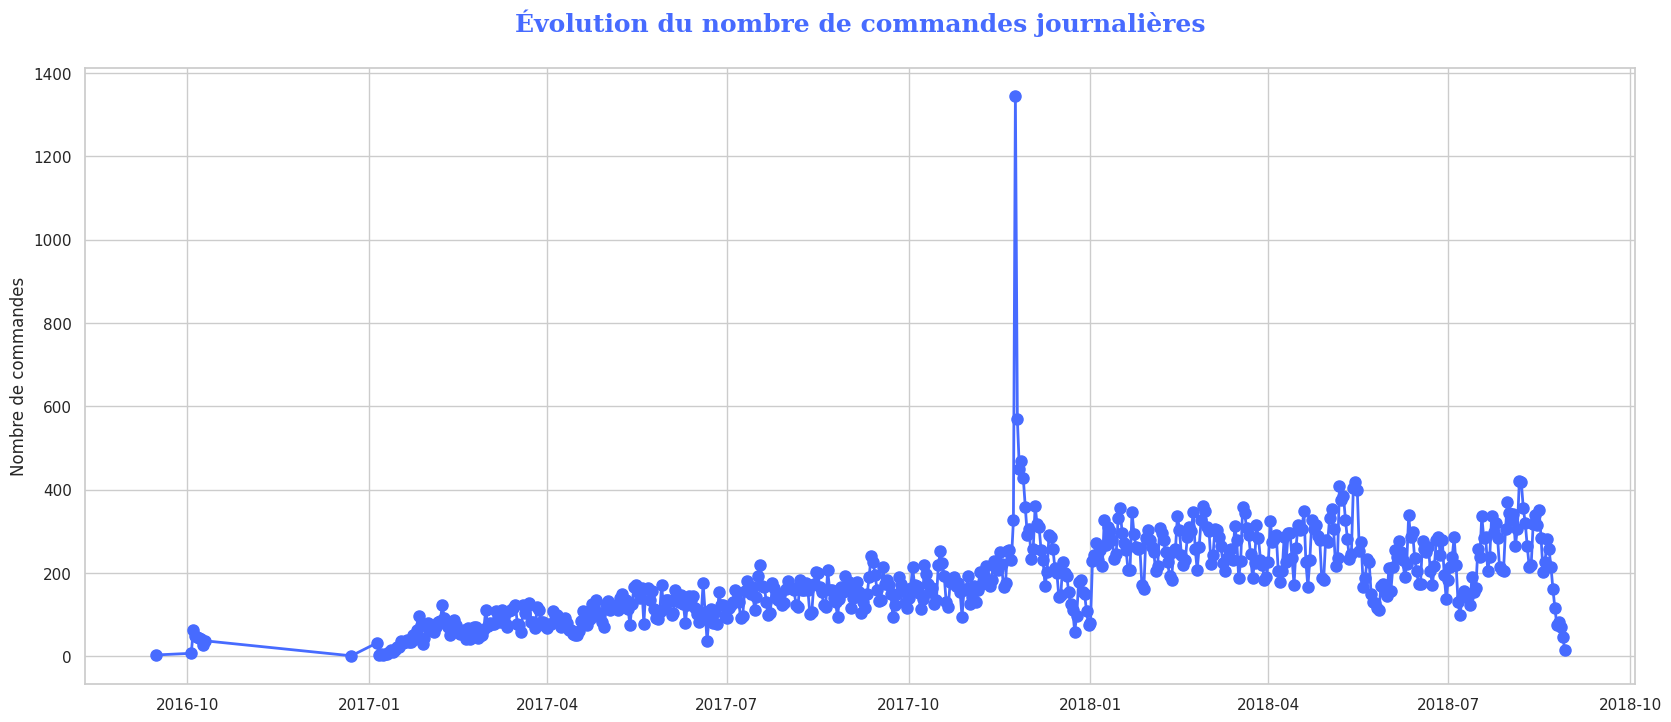

In [ ]:
# Calcul du nombre de commandes par jour
orders_per_days = order_items.groupby(order_items["order_purchase_timestamp"]
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]

font_title = {"family": "serif", "color": "#476bff", "weight": "bold", "size": 18}

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(orders_per_days.index, orders_per_days, marker='o', color="#476bff", linestyle='-', linewidth=2, markersize=8)
ax.set_ylabel("Nombre de commandes")
plt.title("Évolution du nombre de commandes journalières\n", fontdict=font_title)
plt.show()

L'examen du graphique ci-dessus révèle une augmentation significative des commandes entre novembre et décembre. Cette élévation peut être attribuée aux achats liés aux cadeaux de fin d'année. Par ailleurs, une période sans commandes est observée entre octobre 2016 et janvier 2017, suggérant une période de relative inactivité pendant cette période spécifique.

In [ ]:
datetime_cols = ["order_purchase_timestamp", "order_delivered_customer_date"]
for col in datetime_cols:
    order_items[col] = order_items[col].astype('datetime64[ns]')
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 8.4+ MB


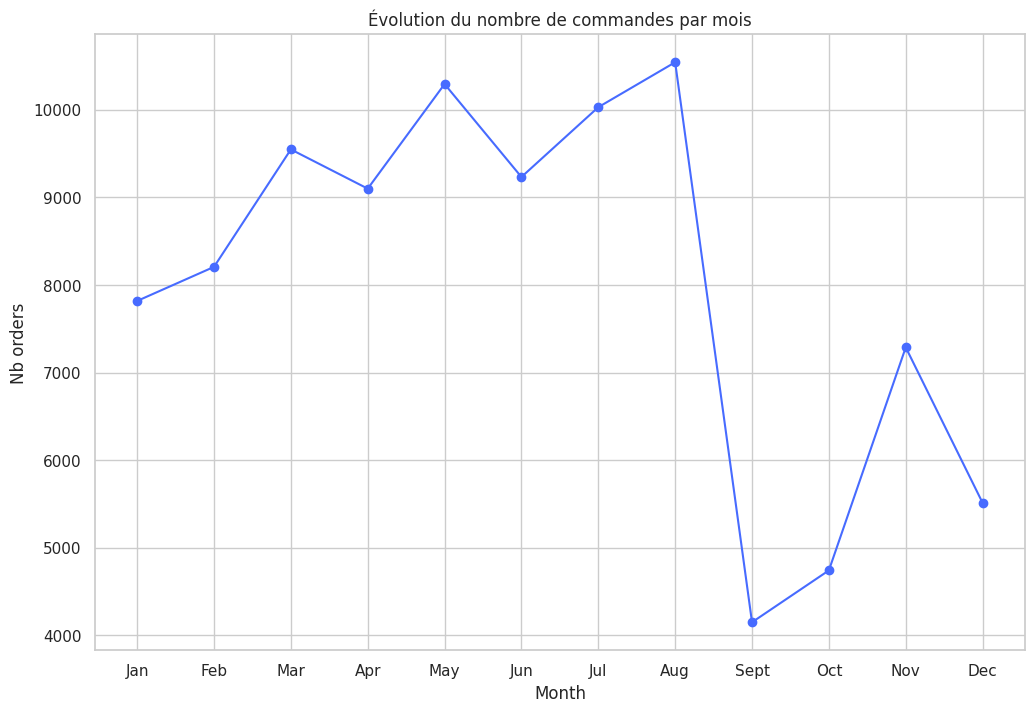

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Nombre unique de commandes par mois
monthly_orders = order_items.groupby(order_items['order_purchase_timestamp'].dt.month).agg({"order_id": "nunique"})

fig, ax = plt.subplots(figsize=(12, 8))
monthly_orders.plot(kind="line", marker='o', color="#476bff",
                    title="Évolution du nombre de commandes par mois",
                    ylabel="Nb orders", xlabel="Month", legend=False, ax=ax)

plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                              'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation='horizontal')
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px

# Nombre unique de commandes par jour de la semaine
daily_orders = order_items.groupby(order_items['order_purchase_timestamp'].dt.dayofweek).agg({"order_id": "nunique"}).reset_index()

days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

fig = px.pie(daily_orders, names=days_of_week, title="Répartition des commandes par jour de la semaine",
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], hole=0.3, insidetextorientation='radial')

fig.show()

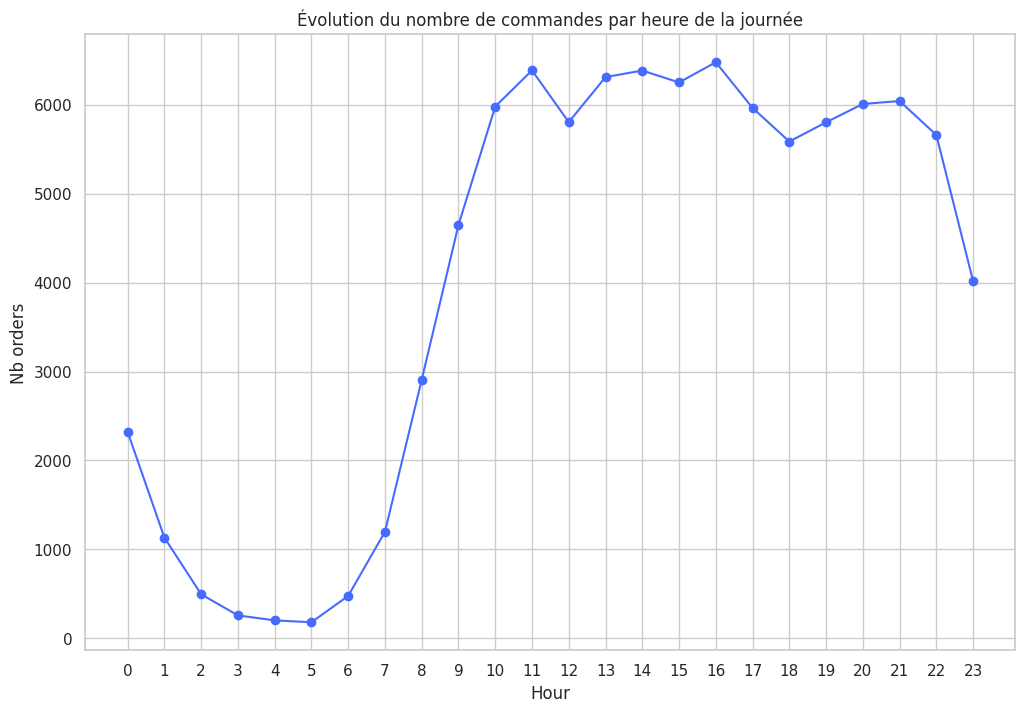

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Nombre unique de commandes par heure de la journée
hourly_orders = order_items.groupby(order_items['order_purchase_timestamp'].dt.hour).agg({"order_id": "nunique"})

fig, ax = plt.subplots(figsize=(12, 8))
hourly_orders.plot(kind="line", marker='o', color="#476bff",
                    title="Évolution du nombre de commandes par heure de la journée",
                    ylabel="Nb orders", xlabel="Hour", legend=False, ax=ax)

plt.xticks(np.arange(0, 24), rotation='horizontal')
plt.grid(True)
plt.show()

On remarque les plus gros écart sur les données mensuelles. Vérifions les variances de chiffre d'affaire sur les mois de l'années

<ipython-input-320-191d02bdcb00>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




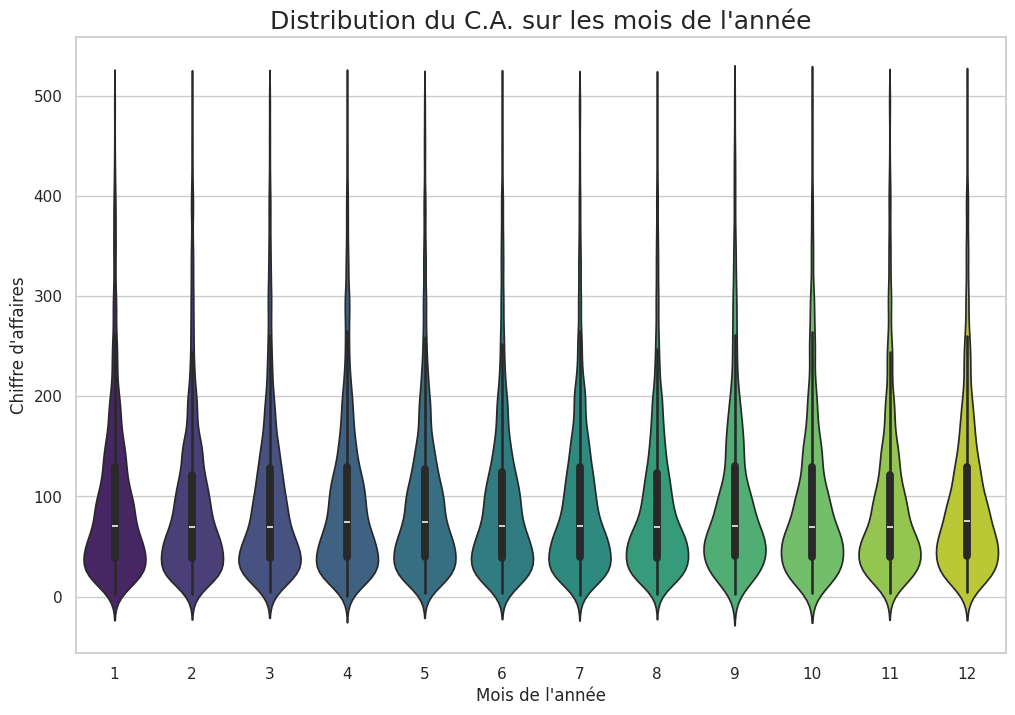

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

order_items['order_purchase_timestamp'] = pd.to_datetime(order_items['order_purchase_timestamp'])

order_items['sale_month'] = order_items['order_purchase_timestamp'].dt.month
filtered_data = order_items[order_items.price < 500]

plt.figure(figsize=(12, 8))
sns.violinplot(x='sale_month', y='price', data=filtered_data, palette='viridis')
plt.title("Distribution du C.A. sur les mois de l'année", fontsize=18)
plt.xlabel("Mois de l'année")
plt.ylabel("Chiffre d'affaires")
plt.show()

Pour le dataset des paiements, vous allons créer de nouvelles variables à savoir :

- Le nombre de moyens de paiement différents utilisés sur la commande.
- Le nombre d'échéances totales de la commande.

In [ ]:
group_payments = order_payments.groupby(by="order_id").agg(
    {"payment_sequential": 'count',
     "payment_installments": 'sum'})

order_items = pd.merge(order_items, group_payments,
                       how="left",
                       on="order_id")
order_items = order_items.rename(columns={
    "payment_sequential": "nb_payment_sequential",
    "payment_installments": "sum_payment_installments"})
order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0


In [ ]:
order_items['order_id'].value_counts().sort_values(ascending = False)

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
f6b73cb42a81880d54cdbf2059599d93     1
f6b803d15fa58d6e0409ce0cda40121b     1
f6b99780deb1f264dee5f8b809a3a34f     1
f6b9db7ac3bc6be81597b909a90978fd     1
fffe41c64501cc87c801fd61db3f6244     1
Name: order_id, Length: 96478, dtype: int64

- Répartition des moyens de paiement utilisés pour décider si cette information est importante ou non dans les analyses :

In [ ]:
import plotly.express as px

fig = px.pie(order_payments, names='payment_type',
             title="Répartition des moyens de paiement utilisés sur le site",
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.show()

In [ ]:
order_payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

On remarque que 74% des paiements environ sont réalisés en carte bancaire. Nous ne prendrons donc pas en considération cette variable dans nos explorations.

Pour les avis clients, nous allons également créer une nouvelle variable qui indiquera seulement si oui ou non la commande a été notée (True or False) et une seconde variable qui reprendra la note attribuée.

In [ ]:
group_reviews = order_reviews.groupby("order_id").agg({
    "review_id": "count",
    "review_score": "mean"})

order_items = pd.merge(order_items, group_reviews,
                       how="left",
                       on="order_id")
order_items = order_items.rename(columns={
    "review_id": "nb_of_reviews"})
#order_items['is_reviewed'] =
order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments,nb_of_reviews,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0,1.0,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0,1.0,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0,1.0,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0,1.0,5.0


In [ ]:
order_items["is_reviewed"] = np.where(order_items["nb_of_reviews" ] >= 1,
                                      True, False)

In [ ]:
order_items["is_reviewed"].value_counts(normalize = True)

True     0.992495
False    0.007505
Name: is_reviewed, dtype: float64

- Répartion des notes attribuées aux commandes du site

In [ ]:
import plotly.express as px

fig = px.histogram(order_reviews, x="review_score",
                   title="Répartition des notes attribuées aux commandes",
                   color_discrete_sequence=[px.colors.qualitative.Set3[2]])

fig.update_layout(xaxis=dict(tickvals=list(range(1, 6)),
                             ticktext=list(map(str, range(1, 6)))))

fig.show()

- Jointure sur le fichier clients

In [ ]:
order_items = pd.merge(order_items, order_payments,
                        how="left",
                        on="order_id")
order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments,nb_of_reviews,review_score,is_reviewed,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0,1.0,5.0,True,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0,1.0,4.0,True,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0,1.0,5.0,True,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0,1.0,4.0,True,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0,1.0,5.0,True,1.0,credit_card,3.0,218.04


In [ ]:
order_items = pd.merge(order_items, customers,
                       how="left",
                        on="customer_id")
order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,...,review_score,is_reviewed,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,...,5.0,True,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,...,4.0,True,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,...,5.0,True,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,...,4.0,True,1.0,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,...,5.0,True,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


-  jointure avec les produits / catégories

In [ ]:
data = pd.merge(order_items, products,
               how="left",
               on="product_id")
data.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,...,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,...,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,58.0,598.0,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,...,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,56.0,239.0,2.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,...,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,59.0,695.0,2.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,...,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,42.0,480.0,1.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,...,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59.0,409.0,1.0,garden_tools


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115038 entries, 0 to 115037
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115038 non-null  object        
 1   order_item_id                  115038 non-null  int64         
 2   product_id                     115038 non-null  object        
 3   price                          115038 non-null  float64       
 4   freight_value                  115038 non-null  float64       
 5   customer_id                    115038 non-null  object        
 6   order_status                   115038 non-null  object        
 7   order_purchase_timestamp       115038 non-null  datetime64[ns]
 8   order_delivered_customer_date  115030 non-null  datetime64[ns]
 9   sale_month                     115038 non-null  int64         
 10  nb_payment_sequential          115035 non-null  float64       
 11  

**Feature engineering en fonction du client**

Maintenant que nous avons notre dataset étendu, nous allons centrer les données obtenues sur le client et non sur les commandes en créant de nouvelles variables. Comme nous l'avons vu précédement, l'identifiant unique du client est contenu dans la variable customer_unique_id.

Commençons par créer une variable contenant le délai de livraison de chaque commande (et suppression de la variable order_delivered_customer_date) :

In [ ]:
data["delivery_delta_days"] = (data.order_delivered_customer_date
                               - data.order_purchase_timestamp)\
                              .dt.round('1d').dt.days
data.drop("order_delivered_customer_date", axis=1, inplace=True)

In [ ]:
data.columns

Index(['order_id', 'order_item_id', 'product_id', 'price', 'freight_value',
       'customer_id', 'order_status', 'order_purchase_timestamp', 'sale_month',
       'nb_payment_sequential', 'sum_payment_installments', 'nb_of_reviews',
       'review_score', 'is_reviewed', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_category_name', 'delivery_delta_days'],
      dtype='object')

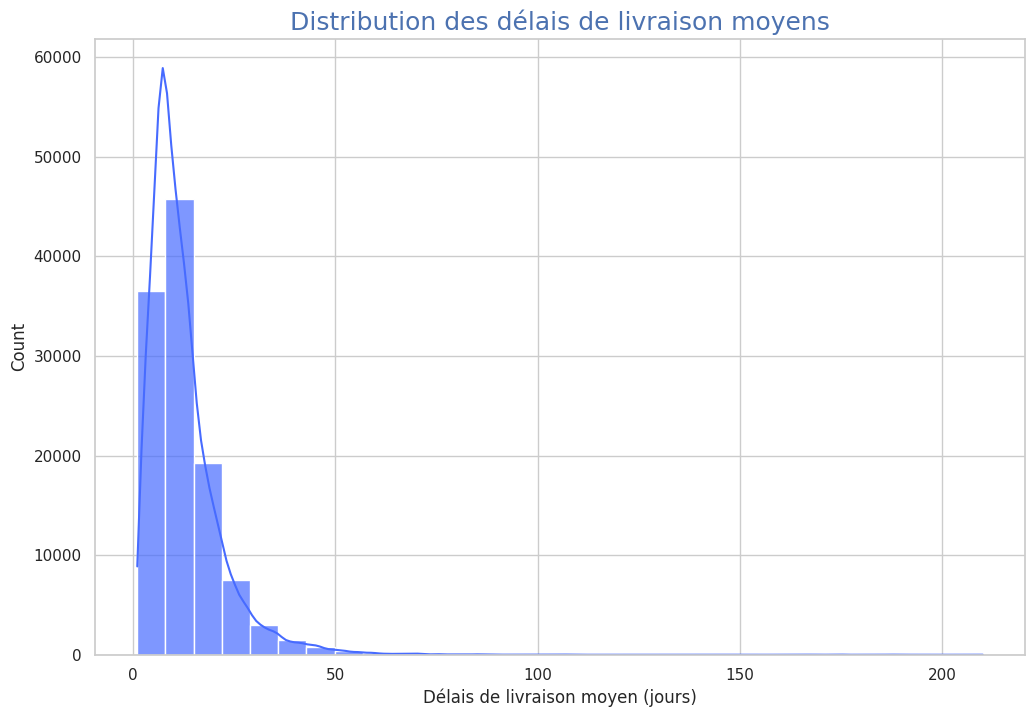

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=data, x="delivery_delta_days", bins=30, kde=True, color="#476bff", alpha=0.7)
plt.xlabel("Délais de livraison moyen (jours)")
plt.title("Distribution des délais de livraison moyens", fontsize=18, color="b")
plt.show()

Puisque le nombre de categorie du produit est élevé, nous avons créé une nouvelle variable : "catégorie_niveau1", regroupant les produits en neuf catégories principales pour faciliter l'encodage lors des prétraitements :

Mode, Santé et beauté, Jouets et bébés, Médias physiques, Épicerie, Technologie, Maison et mobilier, Fleurs et cadeaux, Sport. le site  http://statista.com a été utilisé

In [ ]:
import numpy as np

def categorize_product_category(product_category_name):
    if isinstance(product_category_name, str):
        if any(keyword in product_category_name for keyword in ["fashio", "luggage"]):
            return 'fashion_clothing_accessories'
        elif any(keyword in product_category_name for keyword in ["health", "beauty", "perfum"]):
            return 'health_beauty'
        elif any(keyword in product_category_name for keyword in ["toy", "baby", "diaper"]):
            return 'toys_baby'
        elif any(keyword in product_category_name for keyword in ["book", "cd", "dvd", "media"]):
            return 'books_cds_media'
        elif any(keyword in product_category_name for keyword in ["grocer", "food", "drink"]):
            return 'groceries_food_drink'
        elif any(keyword in product_category_name for keyword in ["phon", "compu", "tablet", "electro", "consol"]):
            return 'technology'
        elif any(keyword in product_category_name for keyword in ["home", "furnitur", "garden", "bath", "house", "applianc"]):
            return 'home_furniture'
        elif any(keyword in product_category_name for keyword in ["flow", "gift", "stuff"]):
            return 'flowers_gifts'
        elif "sport" in product_category_name:
            return 'sport'
    return 'other'

data['product_category'] = data['product_category_name'].apply(categorize_product_category)

In [ ]:
# drop product_category_name column
data.drop("product_category_name", axis=1, inplace=True)

- Nombre de commandes moyen par client

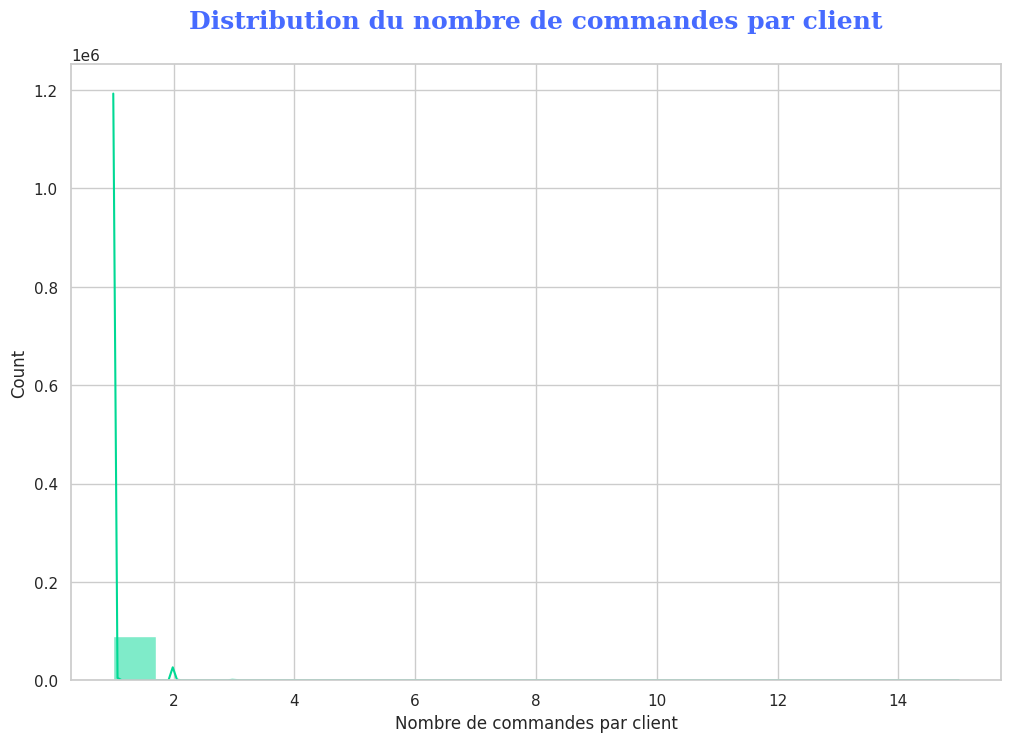

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.histplot(data=data.groupby("customer_unique_id")["order_id"].nunique(), bins=20, color="#00d994", kde=True)
plt.xlabel("Nombre de commandes par client")
plt.title("Distribution du nombre de commandes par client\n", fontdict=font_title)
plt.show()

Le graphique montre que bon nombre des clients ont été effectué une seule commande, ce qui peut rendre difficile le classement de leur catégorie préférée. Pour remédier à cela, nous allons créer des variables pour chaque catégorie de produit, répartissant ainsi le nombre total de produits achetés dans ces commandes. Ensuite, nous calculerons le ratio du nombre de produits par catégorie par rapport au total des produits achetés par le client.

In [ ]:
categories_customers = data.groupby(["customer_unique_id", "product_category"])\
                        .agg({"order_item_id": "count"}).unstack()
categories_customers.columns = categories_customers.columns.droplevel(0)
categories_customers.fillna(0, inplace=True)
categories_customers["total_items"] = categories_customers.sum(axis=1)

for col in categories_customers.columns:
    if (col != "total_items"):
        categories_customers[col] = (categories_customers[col]/categories_customers["total_items"])

categories_customers.reset_index(inplace=True)
categories_customers.head(5)

product_category,customer_unique_id,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


- Nombre moyen d'articles par commande pour chaque client

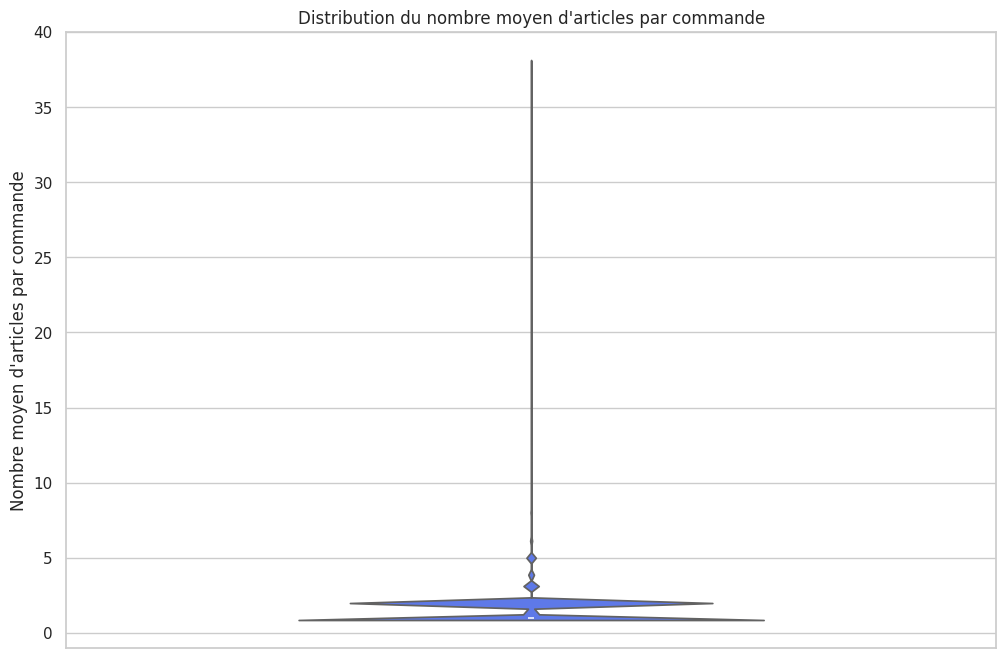

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

products_per_order = data.groupby(["customer_unique_id", "order_id"]).agg({"order_item_id": "count"})
products_per_order = products_per_order.groupby("customer_unique_id").agg({"order_item_id": "mean"}).reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(y=products_per_order["order_item_id"], color="#476bff", width=0.5)
ax.set_ylabel("Nombre moyen d'articles par commande")
ax.set_title("Distribution du nombre moyen d'articles par commande")

plt.show()

Nombre de jours écoulés entre la première et la dernière commande. Nous ramènerons ensuite ce délai au nombre de commande du client.

In [ ]:
recurencies = data.groupby("customer_unique_id")\
                .agg({"order_purchase_timestamp": ["min","max"]})
recurencies.columns = recurencies.columns.droplevel(0)

max_date = data["order_purchase_timestamp"].max()

recurencies["order_total_delay"] = [(y[1] - y[0]).round('1d').days if y[1] != y[0]
                                    else (max_date - y[0]).round('1d').days
                                    for x,y in recurencies.iterrows()]
recurencies.drop(["min", "max"], axis=1, inplace=True)
recurencies.head(5)

,order_total_delay
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,111
0000b849f77a49e4a4ce2b2a4ca5be3f,114
0000f46a3911fa3c0805444483337064,537
0000f6ccb0745a6a4b88665a16c9f078,321
0004aac84e0df4da2b147fca70cf8255,288


- dataset clients et data rfm

Regroupement des données par client :

In [ ]:
data_agg =data.copy()

In [ ]:
data_agg[data_agg["order_id"] == "5f49f31e537f8f1a496454b48edbe34d"]

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,sale_month,nb_payment_sequential,...,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,delivery_delta_days,product_category
42813,5f49f31e537f8f1a496454b48edbe34d,1,d4a3b5aa064bf44e74f1e71862bea22a,9.9,3.05,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,8,1.0,...,127.45,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,59.0,236.0,1.0,4.0,home_furniture
42814,5f49f31e537f8f1a496454b48edbe34d,2,be03d93320192443b8fa24c0ca6ead98,46.8,67.70,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,8,1.0,...,127.45,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,59.0,189.0,3.0,4.0,home_furniture


In [ ]:
data_agg[data_agg["customer_unique_id"] == "7a1de9bde89aedca8c5fbad489c5571c"]

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,sale_month,nb_payment_sequential,...,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,delivery_delta_days,product_category
42813,5f49f31e537f8f1a496454b48edbe34d,1,d4a3b5aa064bf44e74f1e71862bea22a,9.9,3.05,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,8,1.0,...,127.45,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,59.0,236.0,1.0,4.0,home_furniture
42814,5f49f31e537f8f1a496454b48edbe34d,2,be03d93320192443b8fa24c0ca6ead98,46.8,67.70,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,8,1.0,...,127.45,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,59.0,189.0,3.0,4.0,home_furniture
55779,7beaa9cf684b466e527383b1ca40fe07,1,7b3baec97c107a6869809313ee7262ac,289.0,50.55,2bbf7f0d933e52c5f49be30d8cead4a9,delivered,2017-12-02 15:16:36,12,1.0,...,339.55,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,54.0,155.0,6.0,16.0,other


In [ ]:
data_agg['order_purchase_timestamp'].unique()

array(['2017-09-13T08:59:02.000000000', '2017-04-26T10:53:06.000000000',
       '2018-01-14T14:33:31.000000000', ...,
       '2017-10-23T17:07:56.000000000', '2017-08-14T23:02:59.000000000',
       '2018-06-09T17:00:18.000000000'], dtype='datetime64[ns]')

In [ ]:
print("Nombre de lignes avant la suppression :", data_agg.shape[0])
# Création un groupe par 'order_id' et obtenir le nombre de 'product_id' uniques
grouped = data_agg.groupby('order_id')['product_id'].nunique()

# les'order_id' qui ont plus d'un 'product_id' unique
order_ids_with_multiple_products = grouped[grouped > 1].index

# Filtre pour garder les lignes où 'order_id' a plus d'un 'product_id' unique
df_multiple_products = data_agg[data_agg['order_id'].isin(order_ids_with_multiple_products)]

# Pour les 'order_id' restants, trie et suppression des doublons
df_remaining = data_agg[~data_agg['order_id'].isin(order_ids_with_multiple_products)]
df_remaining = df_remaining.sort_values(['order_id'])
df_remaining = df_remaining.drop_duplicates(subset='order_id', keep='last')

# Concaténation des deux DataFrame pour obtenir le résultat final
data_agg = pd.concat([df_multiple_products, df_remaining])

print("Nombre de lignes après la suppression :",  data_agg.shape[0])

Nombre de lignes avant la suppression : 115038
Nombre de lignes après la suppression : 101389


In [ ]:
print("Nombre de colonnes avant la suppression :", data_agg.shape[1])
data_agg = data_agg.drop(["product_id"], axis=1)
print("Nombre de colonnes après la suppression :", data_agg.shape[1])

Nombre de colonnes avant la suppression : 27
Nombre de colonnes après la suppression : 26


In [ ]:
# Affichage des colonnes actuelles
print("Colonnes actuelles du DataFrame :", data_agg.columns)

Colonnes actuelles du DataFrame : Index(['order_id', 'order_item_id', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'sale_month',
       'nb_payment_sequential', 'sum_payment_installments', 'nb_of_reviews',
       'review_score', 'is_reviewed', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'delivery_delta_days', 'product_category'],
      dtype='object')


In [ ]:
print("Colonnes actuelles du DataFrame :", data_agg.columns)



Colonnes actuelles du DataFrame : Index(['order_id', 'order_item_id', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'sale_month',
       'nb_payment_sequential', 'sum_payment_installments', 'nb_of_reviews',
       'review_score', 'is_reviewed', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'delivery_delta_days', 'product_category'],
      dtype='object')


In [ ]:
from datetime import timedelta
print("Nombre de lignes avant la suppression :", data_agg.shape[0])
# Convertion de order_purchase_timestamp en objet datetime
data_agg['order_purchase_timestamp'] = pd.to_datetime(data_agg['order_purchase_timestamp'])

now = data_agg['order_purchase_timestamp'].max() + timedelta(days=1)

# Regroupement par customer_unique_id et calculer la Récence, la Fréquence et la Valeur Monétaire
data_agg = data_agg.groupby('customer_unique_id').agg({
    "order_id": "nunique",
    "price": "sum",
    "freight_value": "sum",
    "nb_payment_sequential": "mean",
    "sum_payment_installments": "mean",
    "review_score": "mean",
    "delivery_delta_days": "mean",
    "sale_month": lambda x: x.value_counts().index[0],  # Mois de vente préféré
    "order_purchase_timestamp": lambda x: (now - x.max()).days,  # Récence
    "customer_unique_id": "count",  # Fréquence
    "payment_value": "sum"  # Valeur Monétaire
})

# Renommage des colonnes
data_agg.rename(columns={
    "order_id": "nb_orders",
    "price": "total_spend",
    "freight_value": "total_freight",
    "nb_payment_sequential": "mean_payment_sequential",
    "sum_payment_installments": "mean_payment_installments",
    "review_score": "mean_review_score",
    "delivery_delta_days": "mean_delivery_days",
    "sale_month": "favorite_sale_month",  # Mois de vente préféré
    "order_purchase_timestamp": "recency",  # Récence
    "customer_unique_id": "frequency",  # Fréquence
    "payment_value": "monetary_value"  # Valeur Monétaire
}, inplace=True)

# Réinitialiser l'index
data_agg.reset_index(inplace=True)
print("Nombre de lignes après la suppression :", data_agg.shape[0])

Nombre de lignes avant la suppression : 101389
Nombre de lignes après la suppression : 93358


In [ ]:
data_agg.columns

Index(['customer_unique_id', 'nb_orders', 'total_spend', 'total_freight',
       'mean_payment_sequential', 'mean_payment_installments',
       'mean_review_score', 'mean_delivery_days', 'favorite_sale_month',
       'recency', 'frequency', 'monetary_value'],
      dtype='object')

In [ ]:
data_rfm = data_agg[["customer_unique_id", "recency", "frequency","monetary_value"]]
data_rfm

,customer_unique_id,recency,frequency,monetary_value
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89
...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,4134.84
93354,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58
93355,ffff371b4d645b6ecea244b27531430a,568,1,112.46
93356,ffff5962728ec6157033ef9805bacc48,119,1,133.69


In [ ]:
unique_values = data_rfm['frequency'].unique()
print(unique_values)

[ 1  2  4  3  7  5  6  9 10  8 12 20 14 21 15 64 24 16 11]


In [ ]:
data_agg = pd.merge(data_agg, categories_customers, how="left", on="customer_unique_id")
data_agg = pd.merge(data_agg, products_per_order, how="left", on="customer_unique_id")\
    .rename(columns={"order_item_id": "mean_nb_items"})
data_agg = pd.merge(data_agg, recurencies, how="left", on="customer_unique_id")
data_agg.head(6)

,customer_unique_id,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,recency,...,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,mean_nb_items,order_total_delay
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,12.00,1.0,8.0,5.0,6.0,5,112,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,8.29,1.0,1.0,4.0,3.0,5,115,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,114
2,0000f46a3911fa3c0805444483337064,1,69.00,17.22,1.0,8.0,3.0,26.0,3,537,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,17.63,1.0,4.0,4.0,20.0,10,321,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,321
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,16.89,1.0,6.0,5.0,13.0,11,288,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,288
5,0004bd2a26a76fe21f786e4fbd80607f,1,154.00,12.98,1.0,8.0,4.0,2.0,4,146,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,146


In [ ]:
data_agg.columns

Index(['customer_unique_id', 'nb_orders', 'total_spend', 'total_freight',
       'mean_payment_sequential', 'mean_payment_installments',
       'mean_review_score', 'mean_delivery_days', 'favorite_sale_month',
       'recency', 'frequency', 'monetary_value', 'books_cds_media',
       'fashion_clothing_accessories', 'flowers_gifts', 'groceries_food_drink',
       'health_beauty', 'home_furniture', 'other', 'sport', 'technology',
       'toys_baby', 'total_items', 'mean_nb_items', 'order_total_delay'],
      dtype='object')

- Calcul de :

    Le ratio fret / total commande
    
    le prix moyen par commande


In [ ]:
data_agg["freight_ratio"] = round(data_agg["total_freight"] / (data_agg["total_spend"] + data_agg["total_freight"]),2)
data_agg["mean_price_order"] = round(data_agg["total_spend"] / data_agg["nb_orders"],2)
data_agg["total_spend"] = (data_agg["total_spend"] + data_agg["total_freight"])
data_agg.drop("total_freight", axis=1, inplace=True)

 Ajout les données de localisation des clients

In [ ]:
#customers.drop("customer_unique_id", axis=1, inplace=True)
# Select the most frequents values for each customer
customers_info = customers.groupby("customer_unique_id").agg(lambda x:x.value_counts().index[0])
data = pd.merge(data_agg, customers_info,
                how="left",
                on="customer_unique_id")

**Exploration du dataset client**

Nous avons à présent notre dataset complété pour la segmentation de la clientèle. Nous allons faire une rapide exploration de ces données

In [ ]:
data.head(5)

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,recency,frequency,...,toys_baby,total_items,mean_nb_items,order_total_delay,freight_ratio,mean_price_order,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,5.0,6.0,5,112,1,...,0.0,1.0,1.0,111,0.08,129.90,fadbb3709178fc513abc1b2670aa1ad2,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,4.0,3.0,5,115,1,...,0.0,1.0,1.0,114,0.30,18.90,4cb282e167ae9234755102258dd52ee8,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,3.0,26.0,3,537,1,...,0.0,1.0,1.0,537,0.20,69.00,9b3932a6253894a02c1df9d19004239f,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,20.0,10,321,1,...,0.0,1.0,1.0,321,0.40,25.99,914991f0c02ef0843c0e7010c819d642,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,6.0,5.0,13.0,11,288,1,...,0.0,1.0,1.0,288,0.09,180.00,47227568b10f5f58a524a75507e6992c,18040,sorocaba,SP


In [ ]:
null_count_per_column = data.isnull().sum()
null_count_per_column

customer_unique_id                0
nb_orders                         0
total_spend                       0
mean_payment_sequential           1
mean_payment_installments         1
mean_review_score               603
mean_delivery_days                8
favorite_sale_month               0
recency                           0
frequency                         0
monetary_value                    0
books_cds_media                   0
fashion_clothing_accessories      0
flowers_gifts                     0
groceries_food_drink              0
health_beauty                     0
home_furniture                    0
other                             0
sport                             0
technology                        0
toys_baby                         0
total_items                       0
mean_nb_items                     0
order_total_delay                 0
freight_ratio                     0
mean_price_order                  0
customer_id                       0
customer_zip_code_prefix    

In [ ]:
features_to_fill = data.columns[data.isnull().any()]

data[features_to_fill] = data[features_to_fill].apply(lambda x: x.fillna(x.mode()[0]))

print("Modes après le remplissage :")
print(data[features_to_fill].mode(dropna=False).transpose())

print("\nDataFrame après le remplissage :")
print(data)

Modes après le remplissage :
                             0
mean_payment_sequential    1.0
mean_payment_installments  1.0
mean_review_score          5.0
mean_delivery_days         7.0

DataFrame après le remplissage :
                     customer_unique_id  nb_orders  total_spend  \
0      0000366f3b9a7992bf8c76cfdf3221e2          1       141.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f          1        27.19   
2      0000f46a3911fa3c0805444483337064          1        86.22   
3      0000f6ccb0745a6a4b88665a16c9f078          1        43.62   
4      0004aac84e0df4da2b147fca70cf8255          1       196.89   
...                                 ...        ...          ...   
93353  fffcf5a5ff07b0908bd4e2dbc735a684          1      2067.42   
93354  fffea47cd6d3cc0a88bd621562a9d061          1        84.58   
93355  ffff371b4d645b6ecea244b27531430a          1       112.46   
93356  ffff5962728ec6157033ef9805bacc48          1       133.69   
93357  ffffd2657e2aad2907e67c3e9daecbeb      

<ipython-input-274-82838cf087d6>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




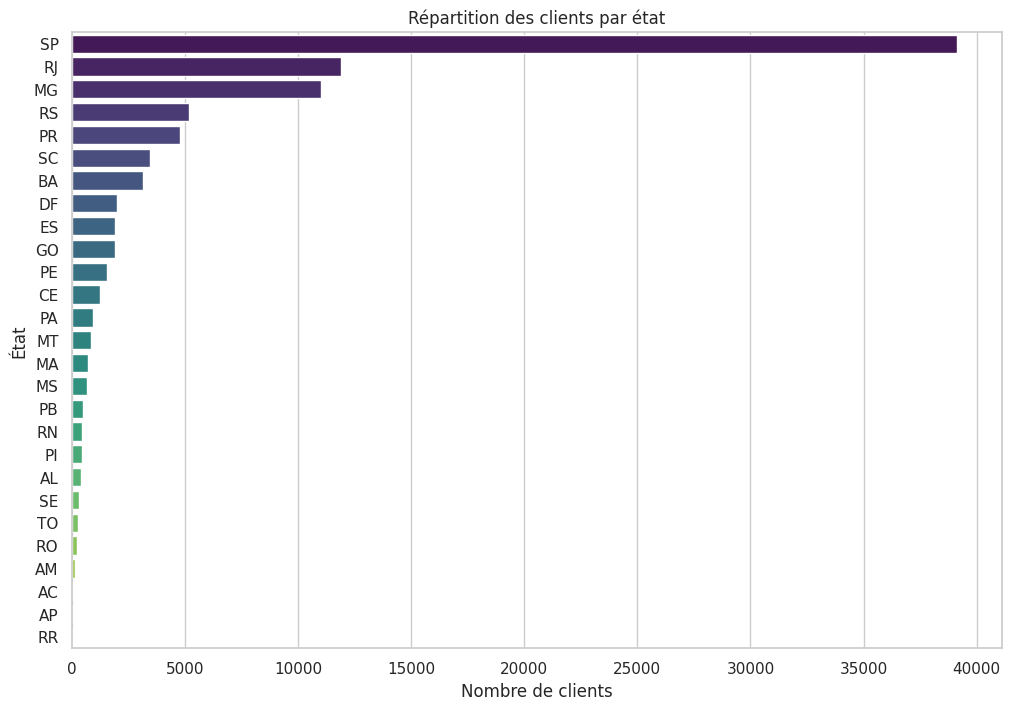

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nombre de clients par état
state_counts = data["customer_state"].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=state_counts.values, y=state_counts.index, palette='viridis')
plt.xlabel('Nombre de clients')
plt.ylabel('État')
plt.title('Répartition des clients par état')
plt.show()

Il est prevu de voir la signification de chaque code du graph et de surtout le prendre en compte dans nos commentaires.

In [ ]:
data.columns

Index(['customer_unique_id', 'nb_orders', 'total_spend',
       'mean_payment_sequential', 'mean_payment_installments',
       'mean_review_score', 'mean_delivery_days', 'favorite_sale_month',
       'recency', 'frequency', 'monetary_value', 'books_cds_media',
       'fashion_clothing_accessories', 'flowers_gifts', 'groceries_food_drink',
       'health_beauty', 'home_furniture', 'other', 'sport', 'technology',
       'toys_baby', 'total_items', 'mean_nb_items', 'order_total_delay',
       'freight_ratio', 'mean_price_order', 'customer_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [ ]:
data = data.drop(["customer_id"], axis=1)

In [ ]:
data.dtypes

customer_unique_id               object
nb_orders                         int64
total_spend                     float64
mean_payment_sequential         float64
mean_payment_installments       float64
mean_review_score               float64
mean_delivery_days              float64
favorite_sale_month               int64
recency                           int64
frequency                         int64
monetary_value                  float64
books_cds_media                 float64
fashion_clothing_accessories    float64
flowers_gifts                   float64
groceries_food_drink            float64
health_beauty                   float64
home_furniture                  float64
other                           float64
sport                           float64
technology                      float64
toys_baby                       float64
total_items                     float64
mean_nb_items                   float64
order_total_delay                 int64
freight_ratio                   float64


In [ ]:
data = data.drop(["customer_zip_code_prefix",], axis=1)

- Transformation des variables catégorielles (OneHotEncoder)

In [ ]:
import pandas as pd

def one_hot(data, colonne_nom):
    return pd.get_dummies(data, columns=[colonne_nom], prefix=colonne_nom)


In [ ]:
print("Nombre de colonnes avant l'encodage :", data.shape[1])
# one-hot encoding sur les colonnes spécifiées
data_cus = one_hot(data, "customer_state")
print("Nombre de colonnes après l'encodage :", data_cus.shape[1])

print("Nombre de colonnes avant l'encodage :", data.shape[1])
# one-hot encoding sur les colonnes spécifiées
data_cus = one_hot(data, "customer_city")
print("Nombre de colonnes après l'encodage :", data_cus.shape[1])

Nombre de colonnes avant l'encodage : 28
Nombre de colonnes après l'encodage : 54
Nombre de colonnes avant l'encodage : 28
Nombre de colonnes après l'encodage : 4112


- Matrice de corrélation

In [ ]:
import plotly.express as px

corr = data.corr()

fig = px.imshow(corr,
                labels=dict(color="Corrélation"),
                color_continuous_scale="blues",
                width=1500, height=900)

fig.update_layout(title_text="Heatmap des corrélations linéaires",
                  title_font=dict(size=18),
                  xaxis=dict(tickangle=45, tickmode='linear'),
                  yaxis=dict(tickangle=45, tickmode='linear'))

fig.show()

<ipython-input-281-666a6d3cf517>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Forte corrélation :
- Entre total_spend et mean_price_order  (0,98)
- total_items et mean_nb_items (0,89)
                   


Sauvegarde de la base de donnée pour l’essais des différentes approches de modélisation

In [ ]:
data_cus.to_csv("olist-cust-seg.csv")